Saving sentimentdataset.csv to sentimentdataset (3).csv
Dataset Shape: (732, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
None


/tmp/ipython-input-2128150872.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="viridis")


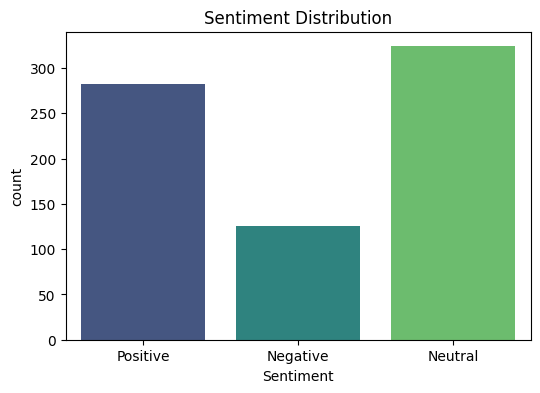

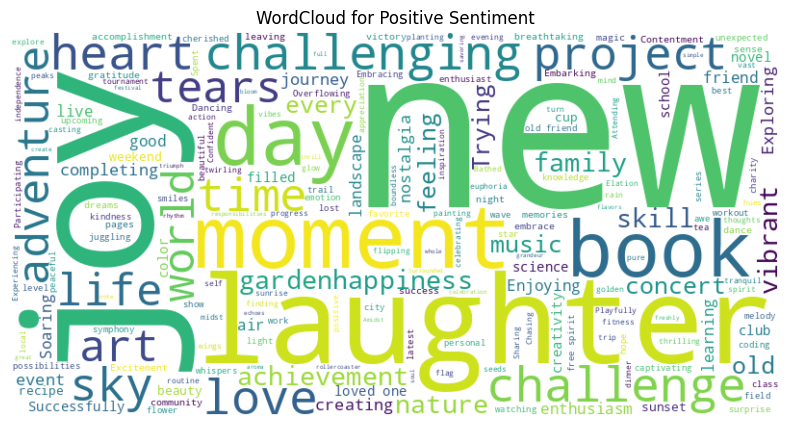

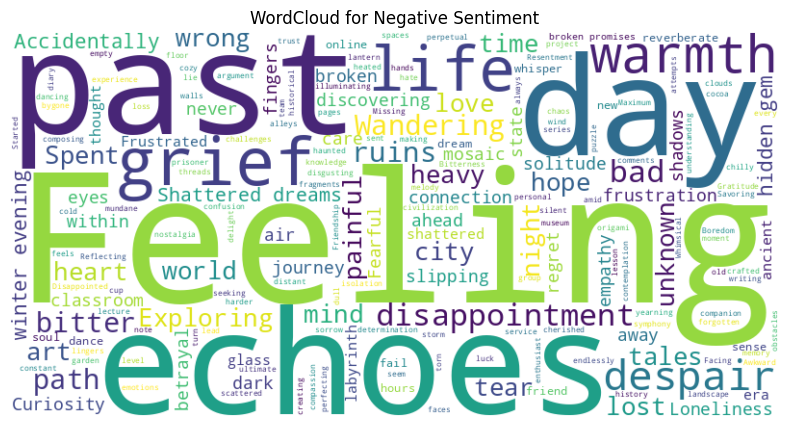

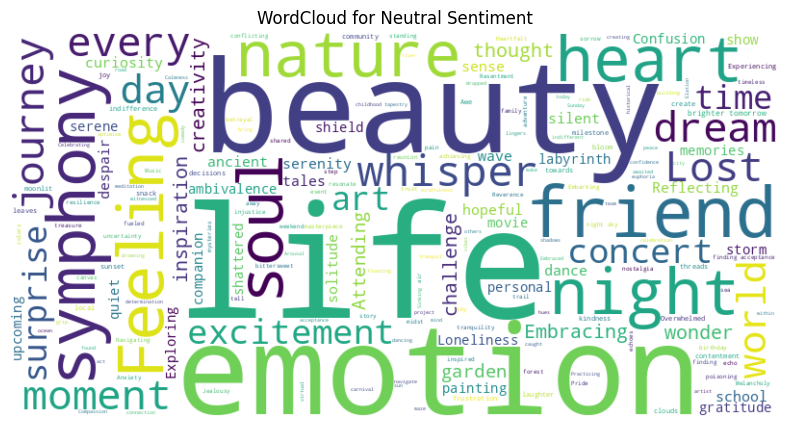

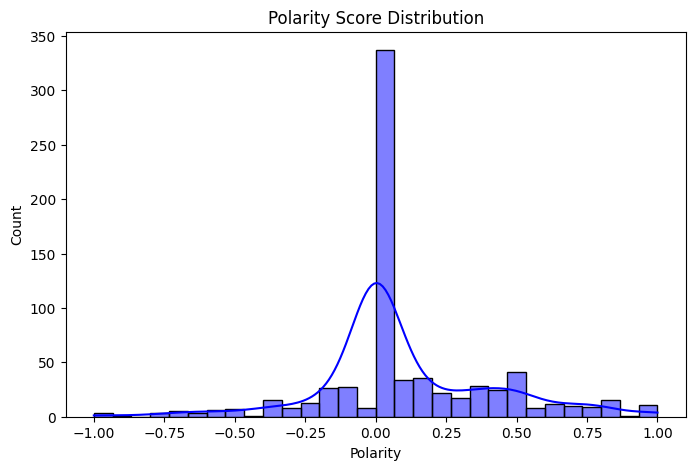


Example Positive Posts:
0     Enjoying a beautiful day at the park!        ...
2     Just finished an amazing workout! 💪          ...
3     Excited about the upcoming weekend getaway!  ...
4     Trying out a new recipe for dinner tonight.  ...
6     Rainy days call for cozy blankets and hot coc...
Name: Text, dtype: object

Example Negative Posts:
1      Traffic was terrible this morning.           ...
5      Feeling grateful for the little things in lif...
9      Missing summer vibes and beach days.         ...
12     Exploring the city's hidden gems.            ...
15     Reflecting on the past and looking ahead.    ...
Name: Text, dtype: object


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("sentimentdataset.csv")
print("Dataset Shape:", df.shape)
df.head()

# 3. Basic Info
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# 4. Sentiment Analysis using TextBlob
def get_sentiment(Text):
    if pd.isnull(Text):
        return "Neutral"
    polarity = TextBlob(str(Text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Text"].apply(get_sentiment)

# 5. Distribution of Sentiments
plt.figure(figsize=(6,4))
sns.countplot(x="Sentiment", data=df, palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

# 6. Sentiment by WordCloud
for sentiment in ["Positive", "Negative", "Neutral"]:
    text = " ".join(df[df["Sentiment"] == sentiment]["Text"].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"WordCloud for {sentiment} Sentiment")
    plt.show()

# 7. Polarity Score Distribution
df["Polarity"] = df["Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(8,5))
sns.histplot(df["Polarity"], bins=30, kde=True, color="blue")
plt.title("Polarity Score Distribution")
plt.show()

# 8. Example Insights
print("\nExample Positive Posts:")
print(df[df["Sentiment"]=="Positive"]["Text"].head(5))

print("\nExample Negative Posts:")
print(df[df["Sentiment"]=="Negative"]["Text"].head(5))
